<a href="https://colab.research.google.com/github/mo-alrz/Machine-learning/blob/main/Copy_of_Task_Keras_handout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task: Using keras

In [2]:
import numpy as np
import pandas as pd

### Data

From https://archive.ics.uci.edu/ml/datasets/heart+Disease

> **target**: diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing

> **sex**: sex (1 = male; 0 = female)

> **cp**: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic

In [6]:
file_url = "http://storage.googleapis.com/download.tensorflow.org/data/heart.csv"

## read the csv file under the file_url into a pandas dataframe
df = pd.read_csv(file_url)

In [7]:
display(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,52,1,1,118,186,0,2,190,0,0.0,2,0,fixed,0
299,43,0,4,132,341,1,2,136,1,3.0,2,0,reversible,1
300,65,1,4,135,254,0,2,127,0,2.8,2,1,reversible,1
301,48,1,4,130,256,1,2,150,1,0.0,1,2,reversible,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


In [16]:
## create a new dataframe where the ["sex", "cp", "thal"] columns are one-hot encoded.

df_new = pd.get_dummies(df,columns=["sex", "cp", "thal"])

In [17]:
## print out and check class sizes
print("Class sizes:")
df_new["target"].value_counts()

Class sizes:


0    220
1     83
Name: target, dtype: int64

### Train-valid-test split

In [14]:
## import scikit-learn's StandardScaler and train_test_split
from sklearn.model_selection import train_test_split

In [27]:
## create the input array X and target array y from df_new.
## y should be the 1-dimensional numpy array containing the values of the "target" column,
## X should be the 2-dimensional numpy array containing the values of the df_new EXCEPT for the "target" column.

targetcol = "target"

X = df_new.drop(targetcol,axis=1).values
y = df_new[targetcol].values

## print out the shapes of X and y to check they're compatible.
print(X.shape)
print(y.shape)

(303, 22)
(303,)


In [45]:
## Do a shuffled train-test-validation split.
## Train data (X_train, y_train) should be 70% of the data,
## test (X_test, y_test) and validation (X_val, y_val) 15-15% each.
## Use random seeding with seed 42 to obtain reproducible results!

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
print("", X_train.shape, "\n", y_train.shape,
      "\n", X_val.shape, "\n", y_val.shape,
      "\n", X_test.shape, "\n", y_test.shape)

 (212, 22) 
 (212,) 
 (46, 22) 
 (46,) 
 (45, 22) 
 (45,)


Optional: create scaled data

In [46]:
## create a standardscaler, fit it on X_train and create a transformed X_..._scaled scaled array from all X splits.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [47]:
print("", X_train_scaled.shape, "\n", y_train.shape,
      "\n", X_val_scaled.shape, "\n", y_val.shape,
      "\n", X_test_scaled.shape, "\n", y_test.shape)

 (212, 22) 
 (212,) 
 (46, 22) 
 (46,) 
 (45, 22) 
 (45,)


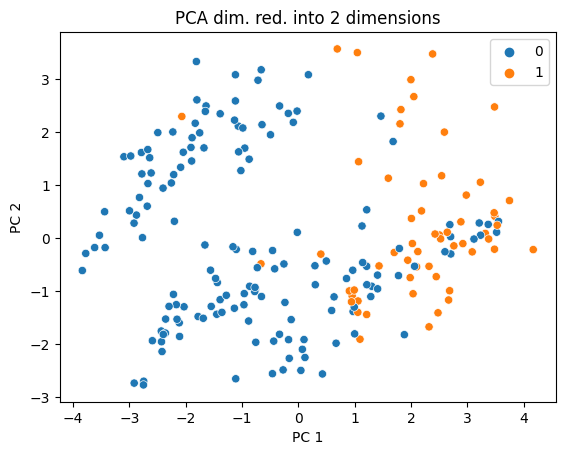

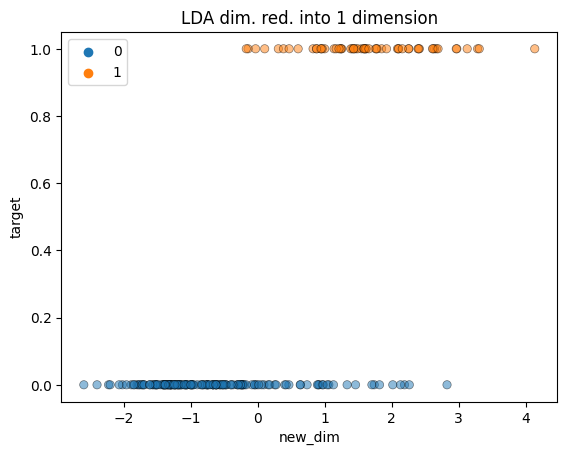

In [48]:
## a little extra: visualization after decomposition -- nothing to do, just interpret code and result
import seaborn as sns
import matplotlib.pyplot as plt

## dimred with PCA into 2D
from sklearn.decomposition import PCA
pca = PCA(2)
X_transformed = pca.fit_transform(X_train_scaled)
sns.scatterplot(x=X_transformed[:,0], y=X_transformed[:,1], hue=y_train);
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA dim. red. into 2 dimensions")
plt.show()

## dimred with LDA into 1D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
X_transformed = lda.fit_transform(X=X_train_scaled, y=y_train)
sns.scatterplot(x=X_transformed[:,0], y=y_train, hue=y_train,
                alpha=0.5, edgecolor="black")
plt.xlabel("new_dim")
plt.ylabel("target")
plt.title("LDA dim. red. into 1 dimension")
plt.show()

### Keras model using sequential API

In [51]:
## import the Dense layer and Sequential class from tf.keras.
## import tensorflow with its usual abbreviation.
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import tensorflow as tf


In [62]:
## Write the function which creates a keras model using the sequential API.
## The model should have 1 layer, which should have 3 neurons in it, and use the 'sigmoid' activation function.
## (For this first layer, feel free to play around with other activation functions, or even lack of it,
## which is None, that is simple linear activation.)
## The final (output) layer should have 1 unit, and the 'sigmoid' activation function.
## Then compile the model, using "binary_crossentropy" loss, "Adam" optimizer, and ["accuracy"] metrics

def create_model():

    tf.keras.backend.clear_session()

    model = Sequential()

    ## add the first layer
    model.add(Dense(units=3,activation='sigmoid',input_shape=(X.shape[1],)))

    ## add the output layer
    model.add(Dense(units=1,activation='sigmoid'))

    ## compile the model
    model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

    return model

In [66]:
## now write a function which creates a model, prints out a summary, fits it, and plots the history.

def create_and_fit_model(X_train, y_train, X_val, y_val, num_epochs, num_batchsize):
    tf.keras.utils.set_random_seed(42)
    model = create_model()

    ## print out model summary
    print(model.summary())

    ## Fit the model and store training history in the history variable.
    ## Fit it on the X_train and y_train data.
    ## Use num_epochs number of epochs, num_batchsize as batch size.
    history = model.fit(X_train,
                        y_train,
                        epochs=num_epochs,
                        batch_size=num_batchsize,
                        validation_data=(X_val, y_val),)

    ## Plotting the history is done for you:
    historydf = pd.DataFrame(history.history)
    historydf.plot(xlabel="epoch", secondary_y=[c for c in historydf.columns if c.endswith("loss")]);

    return model, historydf

Model fit parameters

In [67]:
num_epochs = 100
num_batchsize = 32

#### Do fitting

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 69        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 73 (292.00 Byte)
Trainable params: 73 (292.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/100
7/7 [==============================] - 1s 39ms/step - loss: 1.1137 - accuracy: 0.2783 - val_loss: 1.1048 - val_accuracy: 0.2826
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 1.1070 - accuracy: 0.2783 - val_loss: 1.0981 - val_accuracy: 0.2826
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 1.1004 - accuracy: 0.2783 - val_loss: 1.0915 - val_accuracy: 

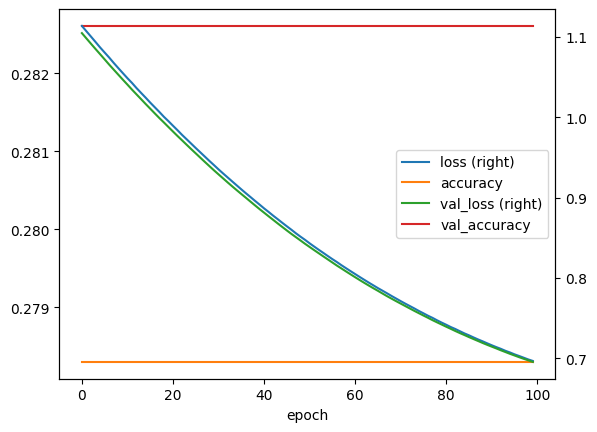

In [68]:
model, historydf = create_and_fit_model(X_train, y_train, X_val, y_val, num_epochs, num_batchsize)

Now create a model and fit on **scaled** data.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 69        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 73 (292.00 Byte)
Trainable params: 73 (292.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/100
7/7 [==============================] - 1s 32ms/step - loss: 0.9659 - accuracy: 0.2783 - val_loss: 0.9683 - val_accuracy: 0.2826
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 0.9533 - accuracy: 0.2783 - val_loss: 0.9553 - val_accuracy: 0.2826
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 0.9410 - accuracy: 0.2783 - val_loss: 0.9426 - val_accuracy

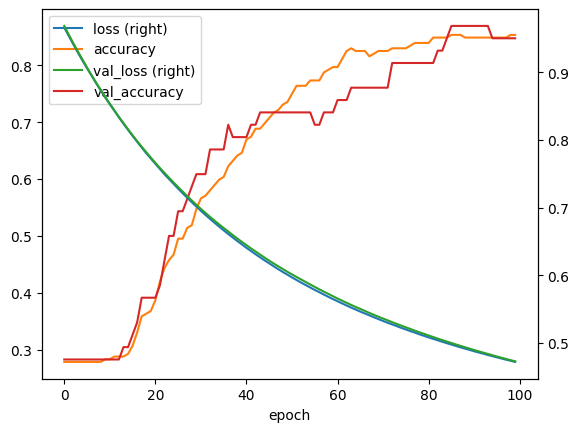

In [69]:
model_scaled, historydf_scaled = create_and_fit_model(X_train_scaled, y_train, X_val_scaled, y_val, num_epochs, num_batchsize)

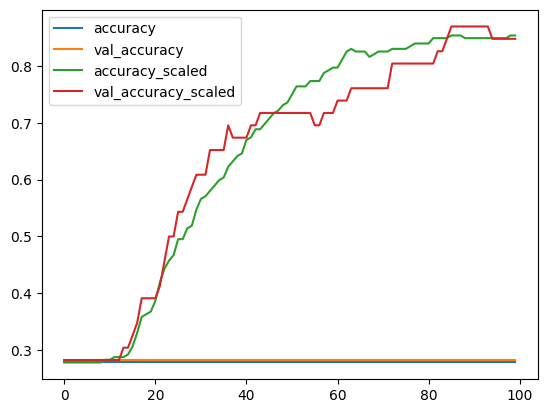

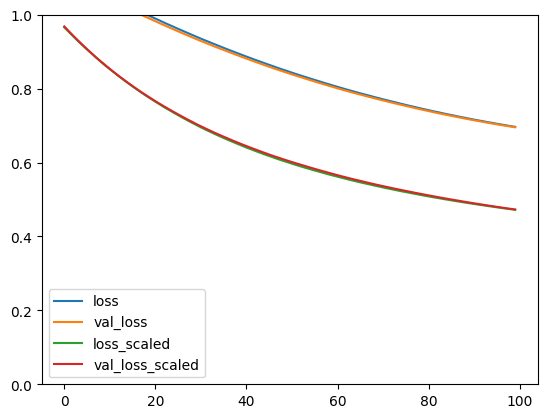

In [70]:
## No task, just compare the plots and interpret what you see:
allhistory = historydf.merge(historydf_scaled,right_index=True, left_index=True, suffixes=["", "_scaled"])
allhistory[[c for c in allhistory.columns if "accuracy" in c]].plot();
allhistory[[c for c in allhistory.columns if "loss" in c]].plot(ylim=(0,1));

## Same model with functional API

In [71]:
## import Input, Model from keras
from tensorflow.keras import Input, Model

In [72]:
def create_model():

    tf.keras.backend.clear_session()

    ## create an input layer (necessary when using the functional API)
    input_layer = Input(shape=(X.shape[1],))

    ## create the first layer as before, but with functional API
    layer1 = Dense(3,activation='sigmoid')(input_layer)

    ## create the output layer as before, but with functional API
    output_layer = Dense(1,activation='sigmoid')(layer1)

    ## create the model that takes input_layer as input and output_layer as output.
    model = Model(inputs=input_layer,outputs=output_layer)

    ## compile the model as before
    model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

    return model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 22)]              0         
                                                                 
 dense (Dense)               (None, 3)                 69        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 73 (292.00 Byte)
Trainable params: 73 (292.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/100
7/7 [==============================] - 1s 32ms/step - loss: 1.1137 - accuracy: 0.2783 - val_loss: 1.1048 - val_accuracy: 0.2826
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 1.1070 - accuracy: 0.2783 - val_loss: 1.0981 - val_accuracy: 0.2826
Epoch

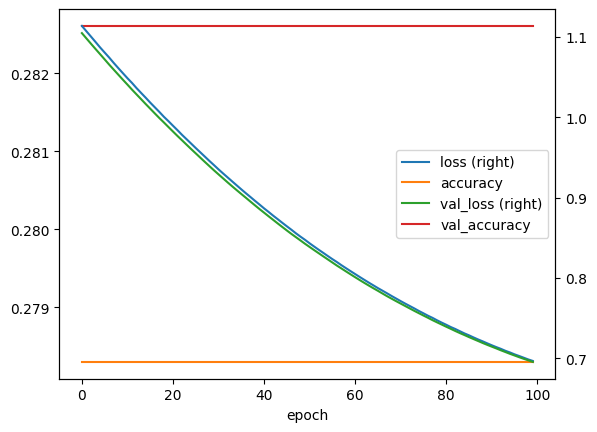

In [73]:
## just run it again to check it works
model, historydf = create_and_fit_model(X_train, y_train, X_val, y_val, num_epochs, num_batchsize)

## Evaluate on test set

In [75]:
## evaluate model on the test set using its evaluate method
print("Model trained on non-scaled data:")
(model_loss, model_accuracy) = model.evaluate(X_test,y_test)


Model trained on non-scaled data:
2/2 [==============================] - 0s 11ms/step - loss: 0.6957 - accuracy: 0.2444


In [76]:
## evaluate model_scaled on the (scaled!) test set using its evaluate method
print("Model trained on non-scaled data:")
(model_scaled_loss, model_scaled_accuracy) = model_scaled.evaluate(X_test_scaled,y_test)


Model trained on non-scaled data:
2/2 [==============================] - 0s 8ms/step - loss: 0.4953 - accuracy: 0.7778


In [77]:
## get the predictions of the model for the test set
y_test_pred = model.predict(X_test)

## get the predictions of model_scaled for the (scaled!) test set
y_test_pred_scaled = model_scaled.predict(X_test_scaled)

2/2 [==============================] - 0s 4ms/step


In [79]:
## just run the code to get classes instead of floats between 0 and 1:

y_test_pred_cl = y_test_pred.round().flatten().astype(int)
y_test_pred_cl_scaled = y_test_pred_scaled.round().flatten().astype(int)

In [81]:
from sklearn import metrics

In [82]:
## Print out the classification report for the test set predictions.
print("Non-scaled:")
print(metrics.classification_report(y_test, y_test_pred_cl))

## Do the same for the predictions of model_scaled.
print("\nScaled:")
print(metrics.classification_report(y_test, y_test_pred_cl_scaled))

Non-scaled:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.24      1.00      0.39        11

    accuracy                           0.24        45
   macro avg       0.12      0.50      0.20        45
weighted avg       0.06      0.24      0.10        45


Scaled:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        34
           1       0.54      0.64      0.58        11

    accuracy                           0.78        45
   macro avg       0.71      0.73      0.72        45
weighted avg       0.79      0.78      0.78        45



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


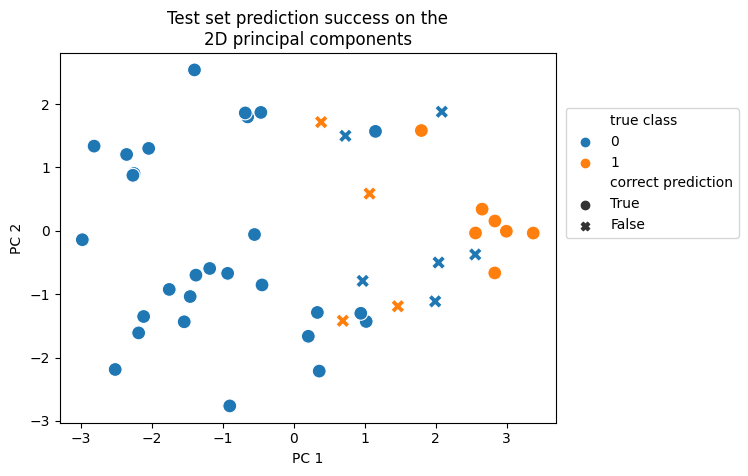

In [83]:
## a little extra: visualization after decomposition --- nothing to do, just run and interpret
import seaborn as sns
import matplotlib.pyplot as plt

## dimred with PCA into 2D
from sklearn.decomposition import PCA

pca = PCA(2)
pca.fit(X_train_scaled)
X_transformed = pca.transform(X_test_scaled)
correct_prediction = pd.Series(y_test == y_test_pred_cl_scaled, name="correct prediction")

sns.scatterplot(x=X_transformed[:,0], y=X_transformed[:,1],
                hue=pd.Series(y_test, name="true class"),
                style=correct_prediction, style_order=[True, False], s=100 );
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("Test set prediction success on the\n2D principal components")
plt.legend(loc=(1.02,0.5))
plt.show()
